# **Import Library**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, balanced_accuracy_score, roc_auc_score
)
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler

# Models
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier




# **Import Data**

In [3]:
train = pd.read_csv("/Users/faizralvi/Documents/Find-IT/dataset/train.csv")
test = pd.read_csv("/Users/faizralvi/Documents/Find-IT/dataset/test.csv")
target = pd.read_csv("/Users/faizralvi/Documents/Find-IT/dataset/target.csv")
target['coppaRisk'] = target['coppaRisk'].astype(int)
train = pd.concat([train, target], axis=1)
id = test[['ID']]


# **Feature Enginering**

In [4]:
country_mapping = {
    'VIET NAM': 'VIETNAM',
    'VENEZUELA': 'VENEZUELA (BOLIVARIAN REPUBLIC OF)',
    'COTE D\'IVOIRE': 'IVORY COAST',
    'TAIWAN, PROVINCE OF CHINA': 'TAIWAN',
}

train['developerCountry'] = train['developerCountry'].replace(country_mapping)
test['developerCountry'] = test['developerCountry'].replace(country_mapping)

# Replace error and unknown entries with 'UNKNOWN'
error_values = [
    'CANNOT IDENTIFY COUNTRY', 'PERSONAL DATA, CAN NOT BE PUBLICLY DISCLOSED ACCORDING TO APPLICABLE LAWS.',
    'STATUTORY MASKING ENABLED', 'ADDRESS NOT LISTED IN PLAYSTORE', 'UNKNOWN', 
    'NO COUNTRY'
]

train['developerCountry'] = train['developerCountry'].replace(error_values, 'UNKNOWN')
test['developerCountry'] = test['developerCountry'].replace(error_values, 'UNKNOWN')

# Contoh Python
known_countries = set(train['developerCountry'].unique())
test['developerCountry'] = test['developerCountry'].apply(
    lambda x: x if x in known_countries else 'UNKNOWN'
)

In [5]:
country_to_region = {
    # North America
    'US': 'NA', 'CA': 'NA', 'MX': 'NA',

    # Latin America
    'BR': 'LATAM', 'AR': 'LATAM', 'CL': 'LATAM', 'PE': 'LATAM', 'CO': 'LATAM', 'GT': 'LATAM', 'EC': 'LATAM',
    'HN': 'LATAM', 'PY': 'LATAM', 'UY': 'LATAM', 'SV': 'LATAM', 'CR': 'LATAM', 'NI': 'LATAM', 'DO': 'LATAM',

    # Europe, Middle East, Africa
    'FR': 'EMEA', 'DE': 'EMEA', 'IT': 'EMEA', 'GB': 'EMEA', 'ES': 'EMEA', 'NL': 'EMEA', 'SE': 'EMEA', 'PL': 'EMEA',
    'RO': 'EMEA', 'CZ': 'EMEA', 'HR': 'EMEA', 'BE': 'EMEA', 'PT': 'EMEA', 'FI': 'EMEA', 'GR': 'EMEA', 'AT': 'EMEA',
    'SK': 'EMEA', 'UA': 'EMEA', 'RU': 'EMEA', 'KZ': 'EMEA', 'BY': 'EMEA', 'AM': 'EMEA', 'AZ': 'EMEA', 'GE': 'EMEA',
    'TR': 'EMEA', 'SA': 'EMEA', 'AE': 'EMEA', 'EG': 'EMEA', 'ZA': 'EMEA', 'NG': 'EMEA', 'UG': 'EMEA', 'KE': 'EMEA',
    'SD': 'EMEA', 'LY': 'EMEA', 'DZ': 'EMEA', 'MA': 'EMEA', 'TN': 'EMEA', 'SN': 'EMEA', 'CI': 'EMEA', 'BJ': 'EMEA',

    # Asia Pacific
    'ID': 'APAC', 'SG': 'APAC', 'MY': 'APAC', 'PH': 'APAC', 'TH': 'APAC', 'VN': 'APAC', 'BD': 'APAC', 'IN': 'APAC',
    'PK': 'APAC', 'CN': 'APAC', 'HK': 'APAC', 'JP': 'APAC', 'KR': 'APAC', 'AU': 'APAC', 'NZ': 'APAC', 'MM': 'APAC',
    'KH': 'APAC', 'MN': 'APAC', 'LK': 'APAC', 'TW': 'APAC', 'AF': 'APAC',

    # Others (optional)
    'GLOBAL': 'GLOBAL', 'NA': 'NA', 'EMEA': 'EMEA', 'LATAM': 'LATAM', 'APAC': 'APAC'
}

country_to_region.update({
    # EMEA tambahan
    'BG': 'EMEA', 'KG': 'EMEA', 'UZ': 'EMEA', 'NO': 'EMEA', 'PS': 'EMEA', 'OM': 'EMEA',
    'JO': 'EMEA', 'QA': 'EMEA', 'CH': 'EMEA', 'LB': 'EMEA', 'CY': 'EMEA', 'HU': 'EMEA',
    'RS': 'EMEA', 'DK': 'EMEA', 'IL': 'EMEA', 'IE': 'EMEA', 'BH': 'EMEA', 'MK': 'EMEA',
    'VE': 'EMEA', 'DJ': 'EMEA', 'YE': 'EMEA', 'CM': 'EMEA', 'RE': 'EMEA', 'AL': 'EMEA',
    'MD': 'EMEA', 'ZW': 'EMEA',

    # LATAM tambahan
    'SX': 'LATAM', 'PR': 'LATAM', 'GY': 'LATAM', 'VE': 'LATAM', 'JM': 'LATAM',

    # APAC tambahan
    'SL': 'APAC', 'GU': 'APAC', 'EE': 'APAC', 'NP': 'APAC', 'ET': 'APAC', 'KG': 'APAC',

    # fallback
    'CD': 'AFRICA',  # DR Congo, biasanya dimasukkan ke Afrika
    'GP': 'LATAM',   # Guadeloupe
})

train['countryCodess'] = train['countryCode'].map(country_to_region)
test['countryCodess'] = test['countryCode'].map(country_to_region)
train['countryCodess'].value_counts()

GLOBAL    5802
EMEA       507
APAC       341
LATAM      143
NA         122
AFRICA       1
Name: countryCodess, dtype: int64

In [6]:
genre_mapping = {
    'Magazines & Newspapers': 'News & Magazines',
}

train['primaryGenreName'] = train['primaryGenreName'].replace(genre_mapping)
test['primaryGenreName'] = test['primaryGenreName'].replace(genre_mapping)



In [7]:
train['countryCode_developerCountry'] = train['countryCode'].astype(str) + "/" + train["developerCountry"]
test['countryCode_developerCountry'] = test['countryCode'].astype(str) + "/" + test["developerCountry"]

train['countryCode_primaryGenreName'] = train['countryCode'].astype(str) + "/" + train["primaryGenreName"]
test['countryCode_primaryGenreName'] = test['countryCode'].astype(str) + "/" + test["primaryGenreName"]

train['countryCode_deviceType'] = train['countryCode'].astype(str) + "/" + train["deviceType"]
test['countryCode_deviceType'] = test['countryCode'].astype(str) + "/" + test["deviceType"]

train['countryCode_appDescriptionBrandSafetyRating'] = train['countryCode'].astype(str) + "/" + train["appDescriptionBrandSafetyRating"].astype(str)
test['countryCode_appDescriptionBrandSafetyRating'] = test['countryCode'].astype(str) + "/" + test["appDescriptionBrandSafetyRating"].astype(str)

train['countryCode_averageUserRating'] = train['countryCode'].astype(str) + "/" + train["averageUserRating"].astype(str)
test['countryCode_averageUserRating'] = test['countryCode'].astype(str) + "/" + test["averageUserRating"].astype(str)



train['developerCountry_primaryGenreName'] = train['developerCountry'].astype(str) + "/" + train["primaryGenreName"]
test['developerCountry_primaryGenreName'] = test['developerCountry'].astype(str) + "/" + test["primaryGenreName"]

train['developerCountry_deviceType'] = train['developerCountry'].astype(str) + "/" + train["deviceType"]
test['developerCountry_deviceType'] = test['developerCountry'].astype(str) + "/" + test["deviceType"]

train['developerCountry_appDescriptionBrandSafetyRating'] = train['developerCountry'].astype(str) + "/" + train["appDescriptionBrandSafetyRating"]
test['developerCountry_appDescriptionBrandSafetyRating'] = test['developerCountry'].astype(str) + "/" + test["appDescriptionBrandSafetyRating"]

train['developerCountry_averageUserRating'] = train['developerCountry'].astype(str) + "/" + train["averageUserRating"].astype(str)
test['developerCountry_averageUserRating'] = test['developerCountry'].astype(str) + "/" + test["averageUserRating"].astype(str)



train['primaryGenreName_deviceType'] = train['deviceType'].astype(str) + "/" + train["primaryGenreName"]
test['primaryGenreName_deviceType'] = test['deviceType'].astype(str) + "/" + test["primaryGenreName"]

train['primaryGenreName_appDescriptionBrandSafetyRating'] = train['appDescriptionBrandSafetyRating'].astype(str) + "/" + train["primaryGenreName"]
test['primaryGenreName_appDescriptionBrandSafetyRating'] = test['appDescriptionBrandSafetyRating'].astype(str) + "/" + test["primaryGenreName"]

train['primaryGenreName_averageUserRating'] = train['appDescriptionBrandSafetyRating'].astype(str) + "/" + train["averageUserRating"].astype(str)
test['primaryGenreName_averageUserRating'] = test['appDescriptionBrandSafetyRating'].astype(str) + "/" + test["averageUserRating"].astype(str)





train['deviceType_appDescriptionBrandSafetyRating'] = train['deviceType'].astype(str) + "/" + train["appDescriptionBrandSafetyRating"].astype(str)
test['deviceType_appDescriptionBrandSafetyRating'] = test['deviceType'].astype(str) + "/" + test["appDescriptionBrandSafetyRating"].astype(str)

train['deviceType_averageUserRating'] = train['deviceType'].astype(str) + "/" + train["averageUserRating"].astype(str)
test['deviceType_averageUserRating'] = test['deviceType'].astype(str) + "/" + test["averageUserRating"].astype(str)



train['averageUserRating_appDescriptionBrandSafetyRating'] = train['averageUserRating'].astype(str) + "/" + train["appDescriptionBrandSafetyRating"].astype(str)
test['averageUserRating_appDescriptionBrandSafetyRating'] = test['averageUserRating'].astype(str) + "/" + test["appDescriptionBrandSafetyRating"].astype(str)


# **Drop Null & Preprocessing**

In [8]:
train.isna().sum()

developerCountry                                        0
countryCode                                            64
userRatingCount                                         0
primaryGenreName                                        0
downloads                                            2149
deviceType                                              0
hasPrivacyLink                                        750
hasTermsOfServiceLink                                4635
hasTermsOfServiceLinkRating                          4635
isCorporateEmailScore                                1128
adSpent                                              5679
appAge                                                 50
averageUserRating                                    1232
appContentBrandSafetyRating                          6162
appDescriptionBrandSafetyRating                         0
mfaRating                                               0
coppaRisk                                               0
countryCodess 

In [9]:

train = train.drop(['hasTermsOfServiceLink', 'hasTermsOfServiceLinkRating', 'appContentBrandSafetyRating', 'downloads', 'adSpent'], axis=1) 
test = test.drop(['hasTermsOfServiceLink', 'hasTermsOfServiceLinkRating', 'appContentBrandSafetyRating', 'downloads', 'adSpent'], axis=1) 

In [10]:
import pandas as pd
import numpy as np
from category_encoders import TargetEncoder

def target_encode(train, test, target_column):
    train_encoded = train.copy()
    test_encoded = test.copy()

    cat_cols = train.select_dtypes(include=['object', 'category']).columns

    # Inisialisasi TargetEncoder
    encoder = TargetEncoder(cols=cat_cols)

    # Fit encoder hanya ke data train
    encoder.fit(train_encoded[cat_cols], train_encoded[target_column])

    # Transformasi
    train_encoded[cat_cols] = encoder.transform(train_encoded[cat_cols])
    test_encoded[cat_cols] = encoder.transform(test_encoded[cat_cols])

    return train_encoded, test_encoded

# Contoh pemanggilan fungsi
# Ganti 'fraud' dengan nama kolom target kamu
train, test = target_encode(train, test, target_column='coppaRisk')


# Replace -1 with NaN for numerical columns only
for col in train.columns:
    if train[col].dtype in ['int8', 'int16', 'float64', 'int64']:
        train[col] = train[col].replace(-1, np.nan)

for col in test.columns:
    if test[col].dtype in ['int8', 'int16', 'float64', 'int64']:
        test[col] = test[col].replace(-1, np.nan)


In [11]:

# Simpan dan pisahkan target
target = train['coppaRisk']
train_features = train.drop(columns=['coppaRisk'])

# Tambahkan identifier agar bisa dipisah lagi setelah digabung
train_features['is_train'] = 1
test['is_train'] = 0

# Gabungkan
combined = pd.concat([train_features, test], axis=0)

# Imputasi KNN
imputer = KNNImputer(n_neighbors=3)
combined_imputed = imputer.fit_transform(combined.drop(columns=['is_train']))

# Ubah kembali ke DataFrame
combined_imputed_df = pd.DataFrame(combined_imputed, columns=combined.columns.drop('is_train'), index=combined.index)

# Pecah lagi jadi train dan test
train = combined_imputed_df[combined['is_train'] == 1].copy()
test = combined_imputed_df[combined['is_train'] == 0].copy()

# Gabungkan kembali target ke train
train['coppaRisk'] = target.values


In [12]:
X = train.drop(['coppaRisk', 'ID'], axis=1)  # ganti dengan nama kolom target
y = train['coppaRisk']  # pastikan 0/1


In [13]:

# Split data 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=56)

In [14]:


# StandardScaler
scaler_standard = StandardScaler()
scaler_standard.fit(X)
X_train_std = scaler_standard.transform(X_train)
X_test_std = scaler_standard.transform(X_test)

# MinMaxScaler
scaler_minmax = MinMaxScaler()
scaler_minmax.fit(X)
X_train_minmax = scaler_minmax.transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

# RobustScaler
scaler_robust = RobustScaler()
scaler_robust.fit(X)
X_train_robust = scaler_robust.transform(X_train)
X_test_robust = scaler_robust.transform(X_test)

# MaxAbsScaler (opsional, kalau ingin pakai juga)
scaler_maxabs = MaxAbsScaler()
scaler_maxabs.fit(X)
X_train_maxabs = scaler_maxabs.transform(X_train)
X_test_maxabs = scaler_maxabs.transform(X_test)


                                              Feature  Importance
12                       countryCode_developerCountry   10.721227
17                  developerCountry_primaryGenreName   10.362794
7                                              appAge    9.446485
3                                    primaryGenreName    9.062736
22   primaryGenreName_appDescriptionBrandSafetyRating    8.454762
2                                     userRatingCount    5.724224
13                       countryCode_primaryGenreName    5.341538
20                 developerCountry_averageUserRating    4.818055
21                        primaryGenreName_deviceType    4.538444
6                               isCorporateEmailScore    3.918080
19   developerCountry_appDescriptionBrandSafetyRating    2.986297
15        countryCode_appDescriptionBrandSafetyRating    2.673803
16                      countryCode_averageUserRating    2.455920
8                                   averageUserRating    2.365739
14        

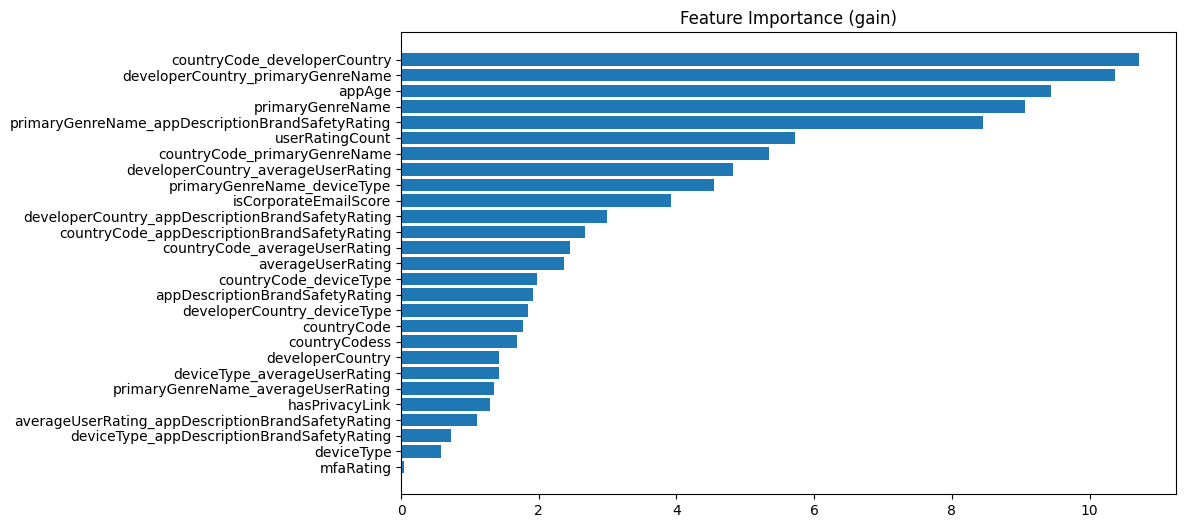

In [15]:
# Train model
model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)

# Ambil feature importance
importance = model.feature_importances_
features = X.columns

# Gabungkan ke DataFrame
fi_df = pd.DataFrame({'Feature': features, 'Importance': importance})
fi_df = fi_df.sort_values(by='Importance', ascending=False)

# Tampilkan
print(fi_df)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(fi_df['Feature'], fi_df['Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importance (gain)")
plt.show()

# **Evaluate Model**

In [16]:


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "CatBoost": CatBoostClassifier(verbose=0),
    "AdaBoost": AdaBoostClassifier(n_estimators=100),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "Random Forest": RandomForestClassifier(), 
}


In [ ]:
"""from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, fbeta_score, balanced_accuracy_score,
    roc_auc_score
)
import pandas as pd

# Inisialisasi dictionary untuk menyimpan skor
all_scores = []

feature_names = X_train.columns.tolist()

# Tambahkan None di awal agar loop pertama tidak drop kolom apapun
for dropped_feature in [None] + feature_names:
    # Buat salinan agar data asli tidak berubah
    X_train_mod = X_train.copy()
    X_test_mod = X_test.copy()

    # Drop fitur jika ada yang mau di-drop
    if dropped_feature is not None:
        X_train_mod = X_train_mod.drop(columns=[dropped_feature])
        X_test_mod = X_test_mod.drop(columns=[dropped_feature])
        print(f"\n[INFO] Dropped feature: {dropped_feature}")
    else:
        print("\n[INFO] Using all features")

    for name, model in models.items():
        # Fit model
        model.fit(X_train_mod, y_train)

        # Prediksi
        y_pred = model.predict(X_test_mod)

        # Probabilitas untuk ROC AUC
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test_mod)[:, 1]
        else:
            y_proba = None

        # Simpan skor ke dictionary
        scores = {
            "Dropped_Feature": dropped_feature if dropped_feature else "None",
            "Model": name,
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred, zero_division=0),
            "Recall": recall_score(y_test, y_pred, zero_division=0),
            "F1": f1_score(y_test, y_pred, zero_division=0),
            "F2": fbeta_score(y_test, y_pred, beta=2, zero_division=0),
            "Balanced_Accuracy": balanced_accuracy_score(y_test, y_pred),
            "ROC_AUC": roc_auc_score(y_test, y_proba) if y_proba is not None else None
        }
        all_scores.append(scores)

        # Tampilkan hasil
        print(f"\n{name}")
        print(f"Accuracy        : {scores['Accuracy']:.4f}")
        print(f"Precision       : {scores['Precision']:.4f}")
        print(f"Recall          : {scores['Recall']:.4f}")
        print(f"F1 Score        : {scores['F1']:.4f}")
        print(f"F2 Score        : {scores['F2']:.4f}")
        print(f"Balanced Acc    : {scores['Balanced_Accuracy']:.4f}")
        print(f"ROC AUC         : {scores['ROC_AUC']:.4f}" if scores['ROC_AUC'] is not None else "ROC AUC         : N/A")

# Ubah hasil ke DataFrame untuk visualisasi atau export
result_df = pd.DataFrame(all_scores)
"""


[INFO] Using all features

Logistic Regression
Accuracy        : 0.9043
Precision       : 0.0000
Recall          : 0.0000
F1 Score        : 0.0000
F2 Score        : 0.0000
Balanced Acc    : 0.4996
ROC AUC         : 0.4880

Gradient Boosting
Accuracy        : 0.9307
Precision       : 0.8000
Recall          : 0.3609
F1 Score        : 0.4974
F2 Score        : 0.4054
Balanced Acc    : 0.6757
ROC AUC         : 0.9401

XGBoost
Accuracy        : 0.9214
Precision       : 0.6264
Recall          : 0.4286
F1 Score        : 0.5089
F2 Score        : 0.4575
Balanced Acc    : 0.7009
ROC AUC         : 0.9163

CatBoost
Accuracy        : 0.9243
Precision       : 0.6667
Recall          : 0.4060
F1 Score        : 0.5047
F2 Score        : 0.4405
Balanced Acc    : 0.6924
ROC AUC         : 0.9339
[LightGBM] [Info] Number of positive: 563, number of negative: 5037
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004533 seconds.
You can set `force_row_wise=true` to remov

In [17]:
accuracy_scores = {}

for name, model in models.items():
    model.fit(X_train_robust, y_train)
    y_pred = model.predict(X_test_robust)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = acc
    print(f"{name} - Accuracy: {acc:.4f}")


/Users/faizralvi/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Accuracy: 0.9257
Gradient Boosting - Accuracy: 0.9293
XGBoost - Accuracy: 0.9179
CatBoost - Accuracy: 0.9250


/Users/faizralvi/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost - Accuracy: 0.9336
HistGradientBoosting - Accuracy: 0.9243
Random Forest - Accuracy: 0.9107


In [18]:
auc_scores = {}

for name, model in models.items():
    model.fit(X_train_robust, y_train)
    y_pred_prob = model.predict_proba(X_test_robust)[:, 1]
    auc = roc_auc_score(y_test, y_pred_prob)
    auc_scores[name] = auc
    print(f"{name} - AUC: {auc:.4f}")


/Users/faizralvi/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - AUC: 0.9112
Gradient Boosting - AUC: 0.9401
XGBoost - AUC: 0.9164
CatBoost - AUC: 0.9334


/Users/faizralvi/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost - AUC: 0.9269
HistGradientBoosting - AUC: 0.9291
Random Forest - AUC: 0.8853


In [20]:


# Buat Voting Classifier (soft voting)
voting_clf = VotingClassifier(estimators=[('dt', CatBoostClassifier(verbose=0, max_depth= 3)), ('svc', GradientBoostingClassifier(max_depth= 3))],voting='soft')

# Fit dan evaluasi
voting_clf.fit(X_train, y_train)
voting_pred_prob = voting_clf.predict_proba(X_test)[:, 1]
voting_auc = roc_auc_score(y_test, voting_pred_prob)

print(f"\nAUC: {voting_auc:.4f}")



AUC: 0.9408


# **Prediksi Model & Submision file**

In [ ]:

scaler_robust.fit(np.concatenate([X, test.drop(columns=['ID'])]))
X_minmax = scaler_robust.transform(X)
test_minmax = scaler_robust.transform(test.drop(columns=['ID']))

voting_clf.fit(X_minmax, y)

voting_pred_prob = voting_clf.predict_proba(test_minmax)[:, 1]


id["coppaRisk"] = voting_pred_prob
id["ID"] = id["ID"].astype(int)
id


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(


,ID,coppaRisk
0,2807,0.003775
1,1742,0.014604
2,806,0.735837
3,2635,0.019329
4,9047,0.003417
...,...,...
2995,2288,0.014771
2996,5541,0.003094
2997,9259,0.003512
2998,3477,0.003123


In [25]:
sub = pd.read_csv("/Users/faizralvi/Documents/Find-IT/dataset/submission_format.csv")
sub

,ID,coppaRisk
0,2807,NaN
1,1742,NaN
2,806,NaN
3,2635,NaN
4,9047,NaN
...,...,...
2995,2288,NaN
2996,5541,NaN
2997,9259,NaN
2998,3477,NaN


In [28]:
# Gabungkan berdasarkan kolom ID
merged = sub.drop(columns=['coppaRisk']).merge(id, on='ID', how='left')
merged

,ID
0,2807
1,1742
2,806
3,2635
4,9047
...,...
2995,2288
2996,5541
2997,9259
2998,3477


In [29]:
merged.to_csv('submission.csv', index=False)